In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [10]:
sns.set(rc={'figure.figsize': (10, 7)})
sns.set(font_scale=1)
sns.set_style('darkgrid')
sns.set_style({'font.family': 'serif', 'font.serif': 'Times New Roman'})

In [3]:
data = pd.read_csv('polar_questions.csv')

In [4]:
data = data[data['disrepancy'] != 1]
data = data[data['enough information'].notna()]

In [5]:
data.loc[data['ChatGPT target'] == 'Not enough information\r\n'] = 'Not enough information'
data.loc[data['enough information'] == 0.0, 'target'] = 'Not enough information'

In [6]:
conf_matrix = confusion_matrix(data['target'], data['ChatGPT target'])

In [7]:
conf_matrix

array([[ 10,   0,   0,   0],
       [  5,   9,   5,   1],
       [ 22,   5, 233,  12],
       [  5,   3,   4,  25]])

In [8]:
data['target'].value_counts()

Not enough information           272
Question particle                 37
Interrogative verb morphology     20
Interrogative intonation only     10
Name: target, dtype: int64

[]

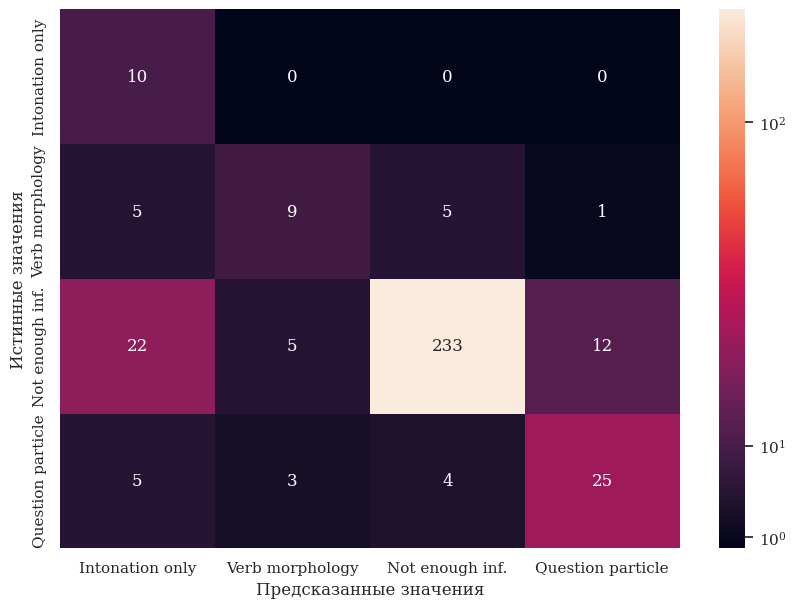

In [12]:
from matplotlib.colors import AsinhNorm
from matplotlib.ticker import MaxNLocator

labels = ['Intonation only', 'Verb morphology', 'Not enough inf.', 'Question particle']
ax=plt.subplot()

sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax, norm=AsinhNorm(clip=True, vmin=0, vmax=200, linear_width=15), vmin=0, cbar_kws={'ticks': [1,10,100]});

# labels, title and ticks
ax.set_xlabel('Предсказанные значения');
ax.set_ylabel('Истинные значения'); 
ax.xaxis.set_ticklabels(labels); 
ax.yaxis.set_ticklabels(labels);
ax.collections[0].colorbar.ax.yaxis.set_ticks([], minor=True)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(data['target'], data['ChatGPT target']))

                               precision    recall  f1-score   support

Interrogative intonation only       0.24      1.00      0.38        10
Interrogative verb morphology       0.53      0.45      0.49        20
       Not enough information       0.96      0.86      0.91       272
            Question particle       0.66      0.68      0.67        37

                     accuracy                           0.82       339
                    macro avg       0.60      0.75      0.61       339
                 weighted avg       0.88      0.82      0.84       339

